<a href="https://colab.research.google.com/github/BrunoDkno368/ETL-EDA-METRICAS/blob/main/ETL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1 - EXTRAT (E)

In [4]:
df= pd.read_csv('/content/drive/MyDrive/EDA practica/ventas_reglas_negocio.csv')
df.head()

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,descuento,metodo_pago,ciudad,total_venta
0,1,2025-07-27,Enrique Cabo,Silla Gamer,Muebles,2,1779.67,0.01,tarjerta,Córdoba,3523.75
1,2,2023-01-22,Eufemia Montalbán Caballero,Tablet,Tecnología,10,849.01,0.36,Efectivo,Buenos Aires,5433.66
2,3,2025-05-02,Vilma Salom Jover,Impresora,Oficina,2,1089.76,0.10,Transferencia,NaN,1961.57
3,4,2024-07-16,Trinidad Caparrós Piñeiro,Escritorio,Muebles,6,1740.51,0.31,Transferencia,Mendoza,7205.71
4,5,2025-02-27,Óscar Cabello Mayoral,Auriculares,Tecnología,3,1123.14,0.06,Tarjeta,Mendoza,3167.25


## 2 - TRASNFORM (T)

### ELIMINAR DUPLICADOS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         2000 non-null   int64  
 1   fecha            1951 non-null   object 
 2   cliente          1912 non-null   object 
 3   producto         2000 non-null   object 
 4   categoria        1911 non-null   object 
 5   cantidad         2000 non-null   int64  
 6   precio_unitario  1942 non-null   float64
 7   descuento        1901 non-null   float64
 8   metodo_pago      1585 non-null   object 
 9   ciudad           1704 non-null   object 
 10  total_venta      2000 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 172.0+ KB


In [6]:
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         2000 non-null   int64  
 1   fecha            1951 non-null   object 
 2   cliente          1912 non-null   object 
 3   producto         2000 non-null   object 
 4   categoria        1911 non-null   object 
 5   cantidad         2000 non-null   int64  
 6   precio_unitario  1942 non-null   float64
 7   descuento        1901 non-null   float64
 8   metodo_pago      1585 non-null   object 
 9   ciudad           1704 non-null   object 
 10  total_venta      2000 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 172.0+ KB


### MANEJO DE VALORES NULOS

#### EN CATEGORIA NaN PASAMOS A SIN DEFINIR

VERIFICAMOS QUE TIENE NaN DENTRO DE SUS REGISTROS

In [8]:
df['categoria'].unique()

array(['Muebles', 'Tecnología', 'Oficina', 'Electrónica', nan],
      dtype=object)

In [9]:
df['categoria'] = df['categoria'].fillna('Sin definir')

CONFIRMAMOS QUE YA NO TIENE NaN

In [10]:
df['categoria'].unique()

array(['Muebles', 'Tecnología', 'Oficina', 'Electrónica', 'Sin definir'],
      dtype=object)

EN PRECIO UNITARIO ELIMINAMOS LOS QUE TIENEN NULOS

VERIFICAMOS QUE TIENE VALORES NULOS

In [11]:
df['precio_unitario'].isnull().sum()

np.int64(58)

In [12]:
df= df.dropna(subset=['precio_unitario'])

CONFIRMAMOS QUE LOS VALORES NULOS FUERON ELIMINADOS

In [13]:
df['precio_unitario'].isnull().sum()

np.int64(0)

VERIFICAMOS QUE LA COLUMNA CLIENTE TIENE VALORES NULOS

In [14]:
df['cliente'].isnull().sum()

np.int64(83)

In [15]:
df.columns

Index(['id_venta', 'fecha', 'cliente', 'producto', 'categoria', 'cantidad',
       'precio_unitario', 'descuento', 'metodo_pago', 'ciudad', 'total_venta'],
      dtype='object')

In [16]:
df['cliente'] = df['cliente'].fillna('Desconocido')

CONFIRMAMOS QUE NO QUEDARON NULOS EN CLIENTE

In [17]:
df['cliente'].isnull().sum()

np.int64(0)

#### ERRORES DE TIPEO EN METODO DE PAGO y NaN

In [18]:
df['metodo_pago'].unique()

array(['tarjerta', 'Efectivo', 'Transferencia', 'Tarjeta', nan],
      dtype=object)

In [19]:
df['metodo_pago']= df['metodo_pago'].replace({'tarjerta':'Tarjeta'})

In [20]:
df['metodo_pago']= df['metodo_pago'].fillna('Desconocido')

In [21]:
df['metodo_pago'].unique()

array(['Tarjeta', 'Efectivo', 'Transferencia', 'Desconocido'],
      dtype=object)

CONFIRMAMOS QUE ESTA CORREGIDO

### TRANSFORMACIONES

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1942 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         1942 non-null   int64  
 1   fecha            1895 non-null   object 
 2   cliente          1942 non-null   object 
 3   producto         1942 non-null   object 
 4   categoria        1942 non-null   object 
 5   cantidad         1942 non-null   int64  
 6   precio_unitario  1942 non-null   float64
 7   descuento        1847 non-null   float64
 8   metodo_pago      1942 non-null   object 
 9   ciudad           1657 non-null   object 
 10  total_venta      1942 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 182.1+ KB


####CONVERTIR FECHA A DATATIME

In [24]:
df['fecha'] = pd.to_datetime(df['fecha'], errors= 'coerce')

#### CREAR LA COLUMNA MES

In [26]:
df["año-mes"] = df['fecha'].dt.to_period('M')

In [27]:
df.columns

Index(['id_venta', 'fecha', 'cliente', 'producto', 'categoria', 'cantidad',
       'precio_unitario', 'descuento', 'metodo_pago', 'ciudad', 'total_venta',
       'año-mes'],
      dtype='object')

In [45]:
df['dia'] = df['fecha'].dt.day_name()

In [49]:
df['margen'] = (df['total_venta'] * 0.2).round(2)

In [51]:
df.head(3)

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,descuento,metodo_pago,ciudad,total_venta,año-mes,dia,margen
0,1,2025-07-27,Enrique Cabo,Silla Gamer,Muebles,2,1779.67,0.01,Tarjeta,Córdoba,3523.75,2025-07,Sunday,704.75
1,2,2023-01-22,Eufemia Montalbán Caballero,Tablet,Tecnología,10,849.01,0.36,Efectivo,Buenos Aires,5433.66,2023-01,Sunday,1086.73
2,3,2025-05-02,Vilma Salom Jover,Impresora,Oficina,2,1089.76,0.10,Transferencia,NaN,1961.57,2025-05,Friday,392.31


## 3 - LOAD (L)

In [55]:
df.to_csv( "/content/drive/MyDrive/EDA practica/arch_limpio.csv" , index=False)

#EDA

##VENTAS POR CATEGORIA

In [56]:
df.columns

Index(['id_venta', 'fecha', 'cliente', 'producto', 'categoria', 'cantidad',
       'precio_unitario', 'descuento', 'metodo_pago', 'ciudad', 'total_venta',
       'año-mes', 'dia', 'margen'],
      dtype='object')

<Axes: xlabel='categoria', ylabel='total_venta'>

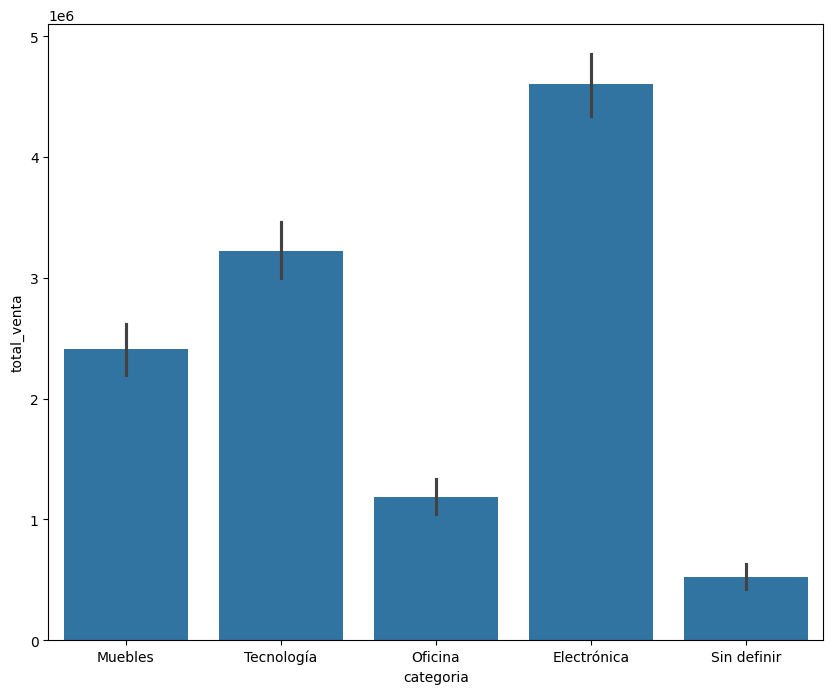

In [61]:
from re import X
plt.figure(figsize=(10,8))
sns.barplot(x="categoria", y="total_venta", data= df, estimator= sum)

## CIUDADES CON MAS VENTAS

Text(0.5, 1.0, 'Top 5 Ciudades con mas ventas')

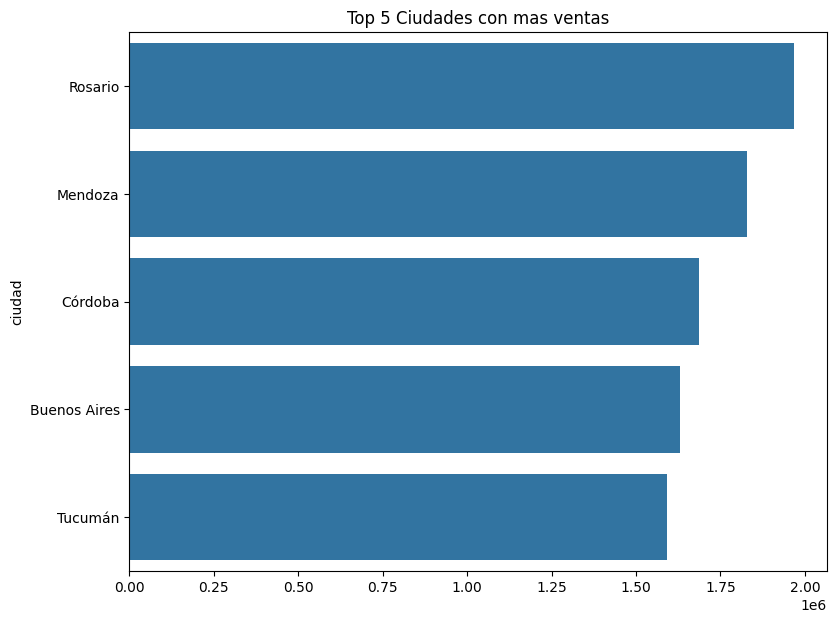

In [66]:
plt.figure(figsize=(9,7))
top_ciudades = df.groupby('ciudad')['total_venta'].sum().sort_values(ascending= False).head(5)
sns.barplot(x=top_ciudades.values, y= top_ciudades.index)
plt.title("Top 5 Ciudades con mas ventas")

## VENTAS POR MES

In [70]:
ventas_mes = df.groupby('año-mes')['total_venta'].sum()

<Axes: xlabel='año-mes'>

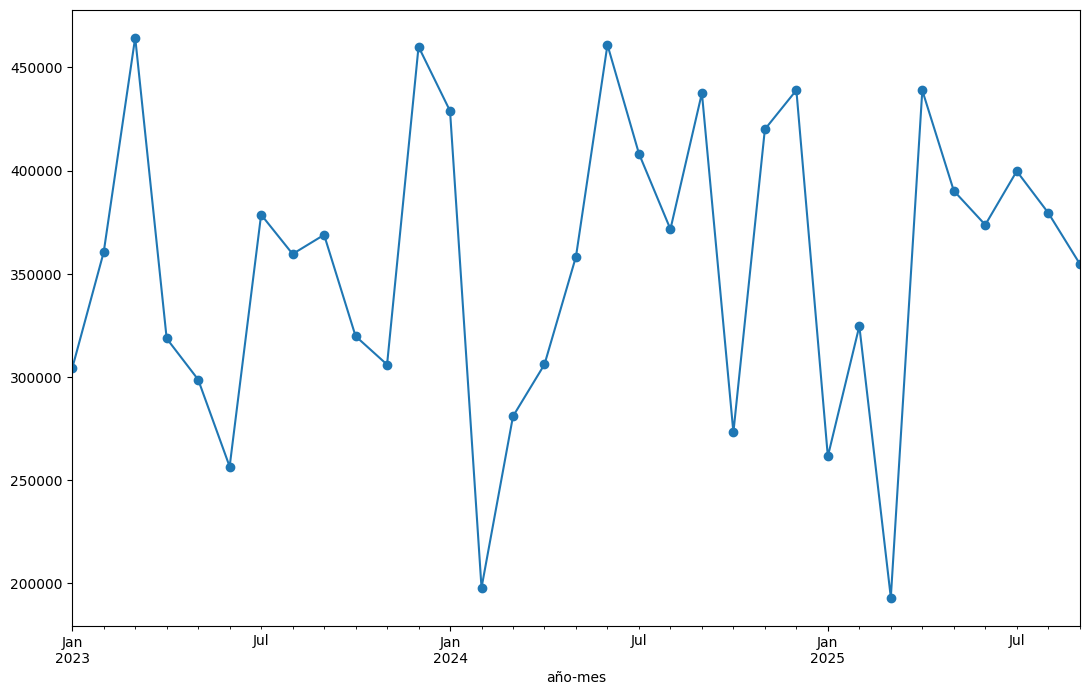

In [74]:
plt.figure(figsize=(13,8))
ventas_mes.plot(marker='o')

## METRICAS

### TOTAL DE VENTAS

In [76]:
total_de_ventas = df['total_venta'].sum()

### TICKET PROMEDIO

In [77]:
ticket_promedio = df['total_venta'].mean()

### MARGEN TOTAL

In [78]:
margen_total = df['margen'].sum()

###CATEGORIA TOP

In [80]:
df.columns

Index(['id_venta', 'fecha', 'cliente', 'producto', 'categoria', 'cantidad',
       'precio_unitario', 'descuento', 'metodo_pago', 'ciudad', 'total_venta',
       'año-mes', 'dia', 'margen'],
      dtype='object')

In [81]:
categoria_top = df.groupby('categoria')['total_venta'].idxmax

###VENTAS POR CATEGORIA

In [84]:
participacion_categorias = (df.groupby("categoria")["total_venta"].sum() / total_de_ventas * 100)

In [86]:
print("📊 MÉTRICAS RESUMEN")
print(f"💰 Total de ventas: ${total_de_ventas:,.2f}")
print(f"🧾 Ticket promedio: ${ticket_promedio:,.2f}")
print(f"📈 Margen total estimado: ${margen_total:,.2f}")
print(f"🏆 Categoría líder en ventas: {categoria_top}")
print("\n% de participación por categoría:\n", participacion_categorias)

📊 MÉTRICAS RESUMEN
💰 Total de ventas: $11,949,080.59
🧾 Ticket promedio: $6,152.98
📈 Margen total estimado: $2,389,816.10
🏆 Categoría líder en ventas: <bound method SeriesGroupBy.idxmax of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7cbdef6e3740>>

% de participación por categoría:
 categoria
Electrónica    38.504167
Muebles        20.178838
Oficina         9.947016
Sin definir     4.401358
Tecnología     26.968622
Name: total_venta, dtype: float64
